In [17]:
#!pip install pandas
import pickle as pkl
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
#%% 
import getpass
import sys
import pickle
import xarray as xr

In [18]:
user=getpass.getuser()
print(user)
if user=='eghbalhosseini':
    analysis_dir='/Users/eghbalhosseini/MyData/snl_2020/analysis/'
    result_dir='/Users/eghbalhosseini/MyData/snl_2020'
elif user=='ehoseini':
    analysis_dir='/om/weka/evlab/ehoseini/MyData/snl_2020/analysis/'
    result_dir='/om/weka/evlab/ehoseini/MyData/snl_2020'


ehoseini


In [ ]:
# create a table for model perplexity 
model_perplexity=[dict(name='nyu-mll_roberta-base-1B-1',perplexity=3.93),]

In [3]:
model1B='nyu-mll_roberta-base-1B-1'
model100M='nyu-mll_roberta-base-100M-1'
model10M='nyu-mll_roberta-base-10M-1'
model_un='roberta-base-untrained'
base='roberta-base'
benchmark='Blank2014fROI-encoding'
benchmark='Pereira2018-encoding'
#benchmark='Futrell2018-encoding'

m1b_file='benchmark='+benchmark+',model='+model1B+',subsample=None.pkl'
m100m_file='benchmark='+benchmark+',model='+model100M+',subsample=None.pkl'
m10m_file='benchmark='+benchmark+',model='+model10M+',subsample=None.pkl'
mun_file='benchmark='+benchmark+',model='+model_un+',subsample=None.pkl'
base_file='benchmark='+benchmark+',model='+base+',subsample=None.pkl'



In [4]:
res_m1b=pd.read_pickle(os.path.join(result_dir,m1b_file))
res_m1b=res_m1b['data']
print('load 1b')
res_m100m=pd.read_pickle(os.path.join(result_dir,m100m_file))
res_m100m=res_m100m['data']
print('load 100m')
res_m10m=pd.read_pickle(os.path.join(result_dir,m10m_file))
res_m10m=res_m10m['data']
print('load 10m')
res_mun=pd.read_pickle(os.path.join(result_dir,mun_file))
res_mun=res_mun['data']
print('load untrained')
res_base=pd.read_pickle(os.path.join(result_dir,base_file))
res_base=res_base['data']
print('load trained')

load 1b
load 100m
load 10m
load untrained
load trained


<xarray.Score (layer: 1, aggregation: 2)>
array([[0.697387, 0.183146]])
Coordinates:
  * aggregation  (aggregation) object 'center' 'error'
  * layer        (layer) <U16 'encoder.layer.11'
Attributes:
    raw:        <xarray.Score (layer: 1, subject_id: 179, aggregation: 2)>\na...
    ceiling:    <xarray.Score (aggregation: 3)>\narray([ 0.755176,  0.033403,...
    model:      roberta-base
    benchmark:  Futrell2018-encoding

In [ ]:
#res_base_martin=pd.read_pickle(os.path.join(result_dir,'from_martin',base_file))
#res_base_martin=res_base_martin['data']
#print('load martin trained')

In [5]:
barWidth = 0.15
x_val=res_base.coords['layer'].values;
r3 = np.arange(len(x_val))
r1 = [x -2*barWidth for x in r3]
r2 = [x - barWidth for x in r3]
r4 = [x + barWidth for x in r3]
r5 = [x + 2*barWidth for x in r3]

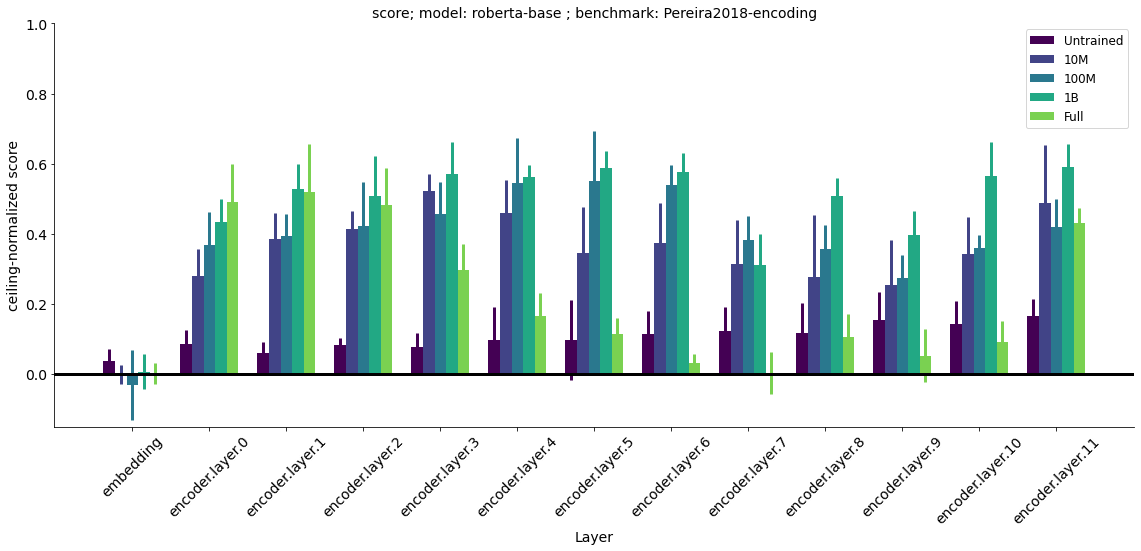

In [7]:
fig = plt.figure(figsize=[25,8])
ax = fig.add_axes([.1,.2,.6,.7])
#plt.scatter(gammas,np.stack(D_s_DV_trade),s=10,c=[0,0,0])
cmap_all=cm.get_cmap('viridis')
all_col=cmap_all(np.divide(np.arange(5),5))


ax.bar(r1,res_mun.values[:,0],width=barWidth,color=all_col[0,:],label='Untrained')
ax.bar(r2,res_m10m.values[:,0],width=barWidth,color=all_col[1,:],label='10M')
ax.bar(r3,res_m100m.values[:,0],width=barWidth,color=all_col[2,:],label='100M')
ax.bar(r4,res_m1b.values[:,0],width=barWidth,color=all_col[3,:],label='1B')
ax.bar(r5,res_base.values[:,0],width=barWidth,color=all_col[4,:],label='Full')


ax.errorbar(r1,res_mun.values[:,0],yerr=res_mun.values[:,1],c=all_col[0,:],fmt='none',capthick=3,elinewidth=3)
ax.errorbar(r2,res_m10m.values[:,0],yerr=res_m10m.values[:,1],c=all_col[1,:],fmt='none',capthick=3,elinewidth=3)
ax.errorbar(r3,res_m100m.values[:,0],yerr=res_m100m.values[:,1],c=all_col[2,:],fmt='none',capthick=3,elinewidth=3)
ax.errorbar(r4,res_m1b.values[:,0],yerr=res_m1b.values[:,1],c=all_col[3,:],fmt='none',capthick=3,elinewidth=3)
ax.errorbar(r5,res_base.values[:,0],yerr=res_base.values[:,1],c=all_col[4,:],fmt='none',capthick=3,elinewidth=3)


ax.set_xlabel('Layer')
ax.axhline(y=0,xmin=0,xmax=res_mun.values.shape[0],color='k',linewidth=3)  
plt.xticks(r3,x_val,rotation=45)
ax.set_ylabel(res_mun.attrs['description'])
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_title('score; model: '+ res_base.attrs['model']+ ' ; benchmark: '+ res_base.attrs['benchmark'])
leg=ax.legend(prop={'size': 12})
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()) :
    item.set_fontsize(14)
ax.set_ylim([-.15,1])


fig.savefig(os.path.join(analysis_dir,res_base.attrs['model']+'_'+res_base.attrs['benchmark']+'_training_effect.pdf'))
fig.savefig(os.path.join(analysis_dir,res_base.attrs['model']+'_'+res_base.attrs['benchmark']+'_training_effect.png'))

## make line plots 

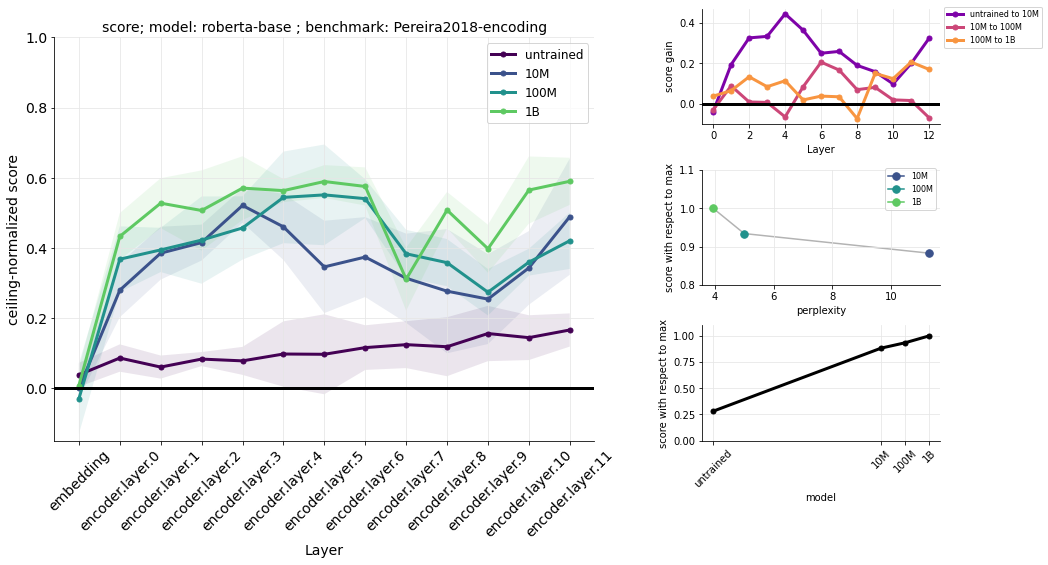

In [8]:
fig = plt.figure(figsize=[15,8])
ax = fig.add_axes([.05,.2,.5,.7])
#plt.scatter(gammas,np.stack(D_s_DV_trade),s=10,c=[0,0,0])
cmap_all=cm.get_cmap('viridis')
all_col=cmap_all(np.divide(np.arange(4),4))
x_val=res_base.coords['layer'].values;
r3 = np.arange(len(x_val))

barWidth = 0.1
r3 = np.arange(len(x_val))
r1 = [x -2*barWidth for x in r3]
r2 = [x - barWidth for x in r3]
r4 = [x + barWidth for x in r3]
r5 = [x + 2*barWidth for x in r3]

y=res_mun.values[:,0]
yerr=res_mun.values[:,1]
ax.plot(r3,y,linewidth=3,color=all_col[0,:],label='untrained',marker='.',markersize=10)
ax.fill_between(r3,y-yerr,y+yerr,facecolor=all_col[0,:],alpha=0.1)

y=res_m10m.values[:,0]
yerr=res_m10m.values[:,1]
ax.plot(r3,y,linewidth=3,color=all_col[1,:],label='10M',marker='.',markersize=10)
ax.fill_between(r3,y-yerr,y+yerr,facecolor=all_col[1,:],alpha=0.1)

y=res_m100m.values[:,0]
yerr=res_m100m.values[:,1]
ax.plot(r3,y,linewidth=3,color=all_col[2,:],label='100M',marker='.',markersize=10)
ax.fill_between(r3,y-yerr,y+yerr,facecolor=all_col[2,:],alpha=0.1)

y=res_m1b.values[:,0]
yerr=res_m1b.values[:,1]
ax.plot(r3,y,linewidth=3,color=all_col[3,:],label='1B',marker='.',markersize=10)
ax.fill_between(r3,y-yerr,y+yerr,facecolor=all_col[3,:],alpha=0.1)
ax.set_xlabel('Layer')
ax.axhline(y=0,xmin=0,xmax=res_mun.values.shape[0],color='k',linewidth=3)  
plt.xticks(r3,x_val,rotation=45)
ax.set_ylabel(res_mun.attrs['description'])
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_title('score; model: '+ res_base.attrs['model']+ ' ; benchmark: '+ res_base.attrs['benchmark'])
leg=ax.legend(prop={'size': 12})
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()) :
    item.set_fontsize(14)
ax.set_ylim([-.15,1])
plt.grid(True, which="both",ls="-", color='0.9')

# plot max prediction for each step  
y=np.asarray([res_mun.values[:,0].max(),res_m10m.values[:,0].max(),res_m100m.values[:,0].max(),res_m1b.values[:,0].max()])
y=y/y.max()
x=np.asarray([1,1e7,1e8,1e9])/1e9
x_val=['untrained','10M','100M','1B']
ax = fig.add_axes([.65,.2,.22,.2])
ax.semilogx(x,y,linewidth=3,color='k',marker='.',markersize=10)
ax.set_ylabel('score with respect to max')
ax.set_xlabel('model')

#plt.xscale('log')
plt.xticks(x,x_val,rotation=45)
ax.set_ylim([-0,1.1])
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.grid(True, which="both",ls="-", color='0.9')
# 
# plot max prediction for vs. perplexity
y=np.asarray([res_m10m.values[:,0].max(),res_m100m.values[:,0].max(),res_m1b.values[:,0].max()])
y=y/y.max()
x=np.asarray([11.31,4.99,3.93])
x_val=['10M','100M','1B']
ax = fig.add_axes([.65,.47,.22,.2])
ax.plot(x,y,color=(.7,.7,.7),zorder=0)
for idx, p in enumerate(x):
    ax.plot(x[idx],y[idx],color=all_col[idx+1,:],marker='.',markersize=15,label=x_val[idx])

leg=ax.legend(prop={'size': 8},bbox_to_anchor=(1., 1.05))
#ax.set_ylim([-0,1.1])
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.grid(True, which="both",ls="-", color='0.9')
ax.set_xlabel('perplexity')
ax.set_ylabel('score with respect to max')
ax.set_ylim([.8,1.1])
# 
ax = fig.add_axes([.65,.75,.22,.2])
y=np.diff(np.stack([res_mun.values[:,0],res_m10m.values[:,0],res_m100m.values[:,0],res_m1b.values[:,0]]).transpose(),axis=1)
#y=y/y.max(axis=0)
cmap_all=cm.get_cmap('plasma')
all_col=cmap_all(np.divide(np.arange(4),4))
ax.plot(r3,y[:,0],linewidth=3,color=all_col[1,:],label='untrained to 10M',marker='.',markersize=10)
ax.plot(r3,y[:,1],linewidth=3,color=all_col[2,:],label='10M to 100M',marker='.',markersize=10)
ax.plot(r3,y[:,2],linewidth=3,color=all_col[3,:],label='100M to 1B',marker='.',markersize=10)
ax.set_xlabel('Layer')
ax.set_ylabel('score gain')
ax.axhline(y=0,xmin=0,xmax=y.shape[0],color='k',linewidth=3)  
plt.grid(True, which="both",ls="-", color='0.9')
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
leg=ax.legend(prop={'size': 8},bbox_to_anchor=(1., 1.05))
fig.savefig(os.path.join(analysis_dir,res_base.attrs['model']+'_'+res_base.attrs['benchmark']+'_Fig1_learning_statistics.pdf'))

fig.savefig(os.path.join(analysis_dir,res_base.attrs['model']+'_'+res_base.attrs['benchmark']+'_Fig1_learning_statistics.png'))


# performance of best layer 

In [13]:
model1B='nyu-mll_roberta-base-1B'
model100M='nyu-mll_roberta-base-100M'
model10M='nyu-mll_roberta-base-10M'
model_un='roberta-base-untrained'
base='roberta-base'
#benchmark='Blank2014fROI-encoding'
benchmark='Pereira2018-encoding'
#benchmark='Futrell2018-encoding'

mun_file='benchmark='+benchmark+',model='+model_un+',subsample=None.pkl'
base_file='benchmark='+benchmark+',model='+base+',subsample=None.pkl'


In [14]:
models=[model10M,model100M,model1B]
models_perf=[]
for model in models:
    model_perf=[]
    for i in range(3):
        print('benchmark='+benchmark+',model='+model+'-'+str(i+1)+',subsample=None.pkl')
        model_file='benchmark='+benchmark+',model='+model+'-'+str(i+1)+',subsample=None.pkl';
        res_=pd.read_pickle(os.path.join(result_dir,model_file))
        res_=res_['data']
        model_perf.append(res_.values)
    models_perf.append(model_perf)

benchmark=Pereira2018-encoding,model=nyu-mll_roberta-base-10M-1,subsample=None.pkl
benchmark=Pereira2018-encoding,model=nyu-mll_roberta-base-10M-2,subsample=None.pkl
benchmark=Pereira2018-encoding,model=nyu-mll_roberta-base-10M-3,subsample=None.pkl
benchmark=Pereira2018-encoding,model=nyu-mll_roberta-base-100M-1,subsample=None.pkl
benchmark=Pereira2018-encoding,model=nyu-mll_roberta-base-100M-2,subsample=None.pkl
benchmark=Pereira2018-encoding,model=nyu-mll_roberta-base-100M-3,subsample=None.pkl
benchmark=Pereira2018-encoding,model=nyu-mll_roberta-base-1B-1,subsample=None.pkl
benchmark=Pereira2018-encoding,model=nyu-mll_roberta-base-1B-2,subsample=None.pkl
benchmark=Pereira2018-encoding,model=nyu-mll_roberta-base-1B-3,subsample=None.pkl


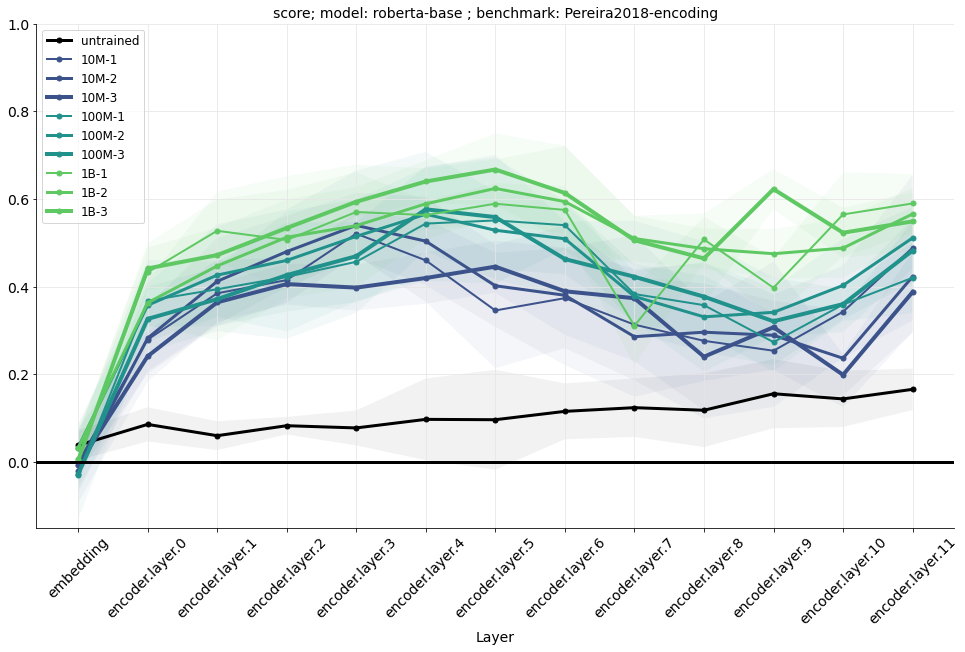

In [15]:
fig = plt.figure(figsize=[15,10])
ax = fig.add_axes([.05,.2,.85,.7])
#plt.scatter(gammas,np.stack(D_s_DV_trade),s=10,c=[0,0,0])
cmap_all=cm.get_cmap('viridis')
all_col=cmap_all(np.divide(np.arange(4),4))
x_val=res_base.coords['layer'].values;
r3 = np.arange(len(x_val))

barWidth = 0.1
r3 = np.arange(len(x_val))
r1 = [x -2*barWidth for x in r3]
r2 = [x - barWidth for x in r3]
r4 = [x + barWidth for x in r3]
r5 = [x + 2*barWidth for x in r3]

y=res_mun.values[:,0]
yerr=res_mun.values[:,1]
ax.plot(r3,y,linewidth=3,color='k',label='untrained',marker='.',markersize=10)
ax.fill_between(r3,y-yerr,y+yerr,facecolor='k',alpha=0.05)

for idx,ys in enumerate(models_perf[0]):
    y=ys[:,0]
    yerr=ys[:,1]
    ax.plot(r3,y,linewidth=idx+2,color=all_col[1,:],label='10M-'+str(idx+1),marker='.',markersize=10)
    ax.fill_between(r3,y-yerr,y+yerr,facecolor=all_col[1,:],alpha=0.05)

for idx,ys in enumerate(models_perf[1]):
    y=ys[:,0]
    yerr=ys[:,1]
    ax.plot(r3,y,linewidth=idx+2,color=all_col[2,:],label='100M-'+str(idx+1),marker='.',markersize=10)
    ax.fill_between(r3,y-yerr,y+yerr,facecolor=all_col[2,:],alpha=0.05)
for idx,ys in enumerate(models_perf[2]):
    y=ys[:,0]
    yerr=ys[:,1]
    ax.plot(r3,y,linewidth=idx+2,color=all_col[3,:],label='1B-'+str(idx+1),marker='.',markersize=10)
    ax.fill_between(r3,y-yerr,y+yerr,facecolor=all_col[3,:],alpha=0.05)
    ax.set_xlabel('Layer')
    
ax.axhline(y=0,xmin=0,xmax=res_mun.values.shape[0],color='k',linewidth=3)  
plt.xticks(r3,x_val,rotation=45)
#ax.set_ylabel(res_mun.attrs['description'])
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_title('score; model: '+ res_base.attrs['model']+ ' ; benchmark: '+ res_base.attrs['benchmark'])
leg=ax.legend(prop={'size': 12})
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()) :
    item.set_fontsize(14)
ax.set_ylim([-.15,1])
plt.grid(True, which="both",ls="-", color='0.9')
fig.savefig(os.path.join(analysis_dir,res_base.attrs['model']+'_'+res_base.attrs['benchmark']+'_Fig2_performance_of_all_models.png'))
fig.savefig(os.path.join(analysis_dir,res_base.attrs['model']+'_'+res_base.attrs['benchmark']+'_Fig2_performance_of_all_models.pdf'))

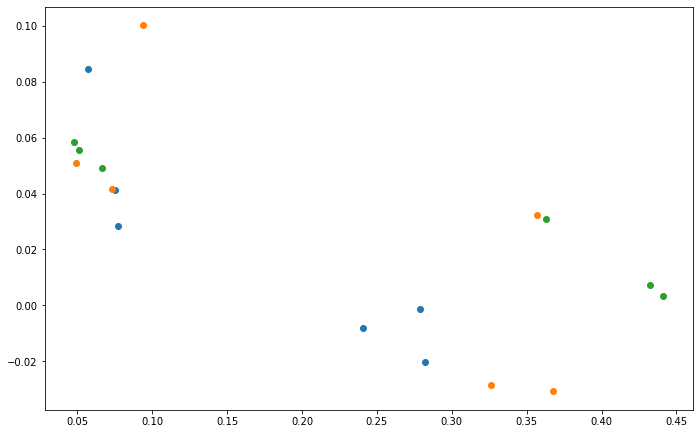

In [16]:
fig = plt.figure(figsize=[15,8])
ax = fig.add_axes([.1,.2,.6,.7])
#plt.scatter(gammas,np.stack(D_s_DV_trade),s=10,c=[0,0,0])
cmap_all=cm.get_cmap('viridis')
all_col=cmap_all(np.divide(np.arange(5),5))

for i, model in enumerate(models):
    model_perf=np.asarray(models_perf[i])
    ax.scatter(model_perf[:,1],model_perf[:,0])



In [ ]:
models